In [8]:
from os.path import dirname, abspath, join
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dirPath = abspath(dirname(''))
data_file = '2020-02-23-19-21-54.bag.csv'

data_path = join(join(dirname(dirPath),'data'), data_file)

with open(data_path, 'r') as f:
    data_raw = pd.read_csv(f)

with open(join(join(dirname(dirPath),'data'), 'path.pkl'), 'rb') as f:
    path = pickle.load(f)
data_raw.tail(10)

,t,speed,x_pos,y_pos,deviation,track_progress
350056,11.228832,1.092,-0.568438,-6.606504,6.740818,NaN
350057,11.228876,1.092,-0.568438,-6.606504,6.740818,NaN
350058,11.228915,1.092,-0.568438,-6.606504,6.740818,NaN
350059,11.228943,1.092,-0.568438,-6.606504,6.740818,NaN
350060,11.228971,1.092,-0.568438,-6.606504,6.740818,NaN
350061,11.229017,1.092,-0.568438,-6.606504,6.740818,NaN
350062,11.229058,1.092,-0.568438,-6.606504,6.740818,NaN
350063,11.229104,1.092,-0.568438,-6.606504,6.740818,NaN
350064,11.229148,1.092,-0.568438,-6.606504,6.740818,NaN
350065,11.397745,1.464,-0.568438,-6.606504,6.740818,NaN


Text(0.5, 1.0, 'speed')

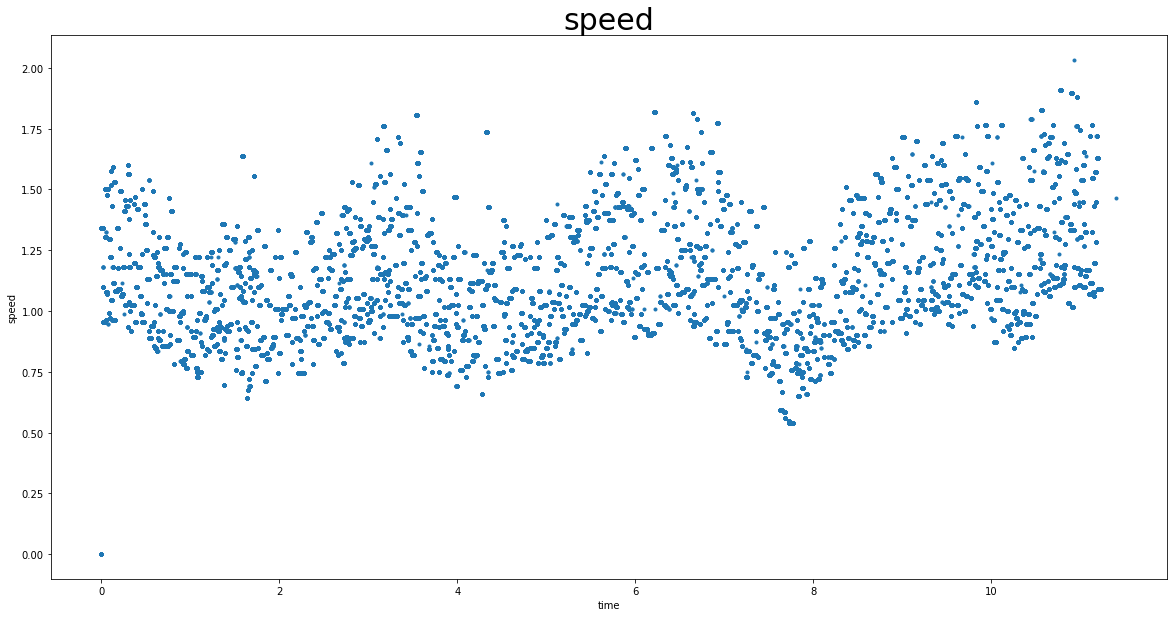

In [9]:
t = data_raw['t']
speed = data_raw['speed']
x_pos = data_raw['x_pos']
y_pos = data_raw['y_pos']
deviation = data_raw['deviation']

grad = 1
start = 0
end = 1200000

fig = plt.figure(figsize=(20,10))
plt.plot(t[start:end][::grad], speed[start:end][::grad], '.')
plt.xlabel('time')
plt.ylabel('speed')
plt.title('speed', fontsize=30)

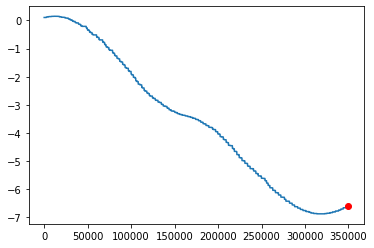

In [10]:
plt.plot(y_pos)
ride_end_ind = 350000
plt.plot(ride_end_ind, y_pos[ride_end_ind], 'or')
laps_change_ind = []


Text(0.5, 1.0, '')

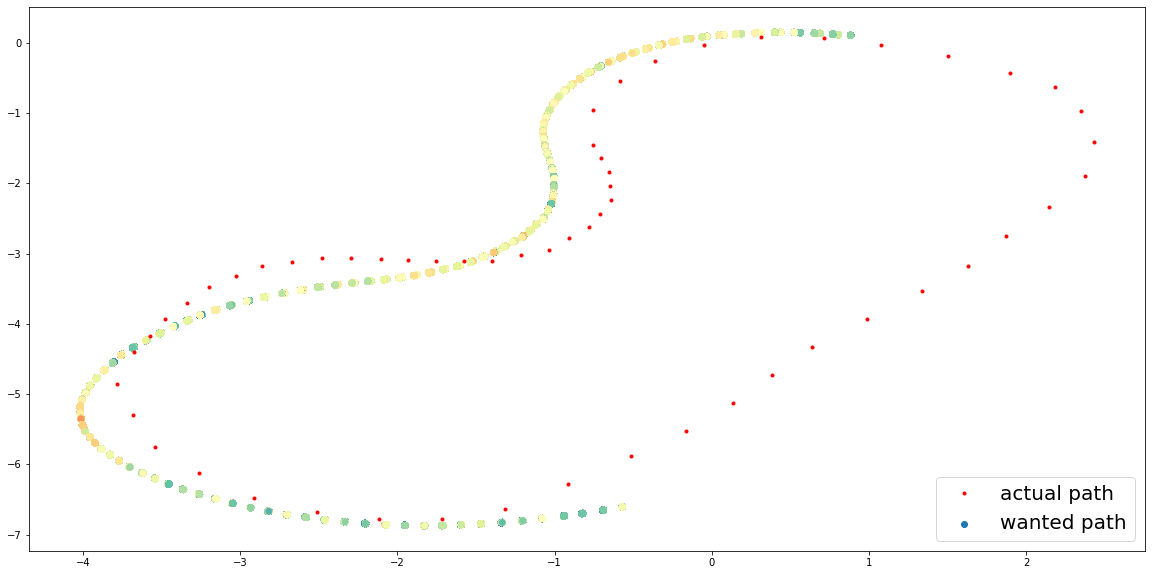

In [11]:
path_x = [point['x'] for point in path]
path_y = [point['y'] for point in path]

fig = plt.figure(figsize=(20,10))
plt.scatter(x_pos[:ride_end_ind], y_pos[:ride_end_ind], c=speed[:ride_end_ind], cmap='Spectral')
plt.plot(path_x, path_y, 'r.')
plt.legend(['actual path', 'wanted path'], loc='lower right', fontsize=20)
plt.title('')

# 3d plot

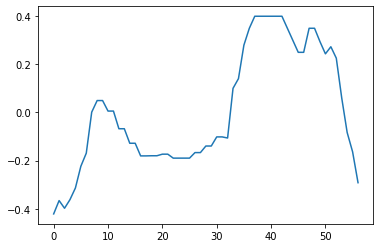

In [12]:
plt.plot(np.diff(path_x))

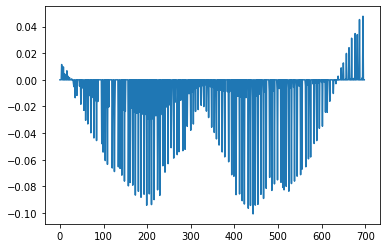

In [13]:
plt.plot(np.diff(y_pos[:ride_end_ind][::500]))

In [16]:
def moving_avg(poses, n):
    N = int(len(poses)/n)
    n = N
    moving_avg = []
    tmp = []
    for i in range(len(poses)):
        tmp.append(poses[i])
        if(i >= N):
            moving_avg.append(np.mean(tmp))
            tmp = []
            N = n+N
    return moving_avg
    

x_avg = moving_avg(x_pos[:ride_end_ind], 1000)
y_avg = moving_avg(y_pos[:ride_end_ind], 1000)
speed_avg = moving_avg(speed[:ride_end_ind], 1000)


Text(0.5, 1.0, '')

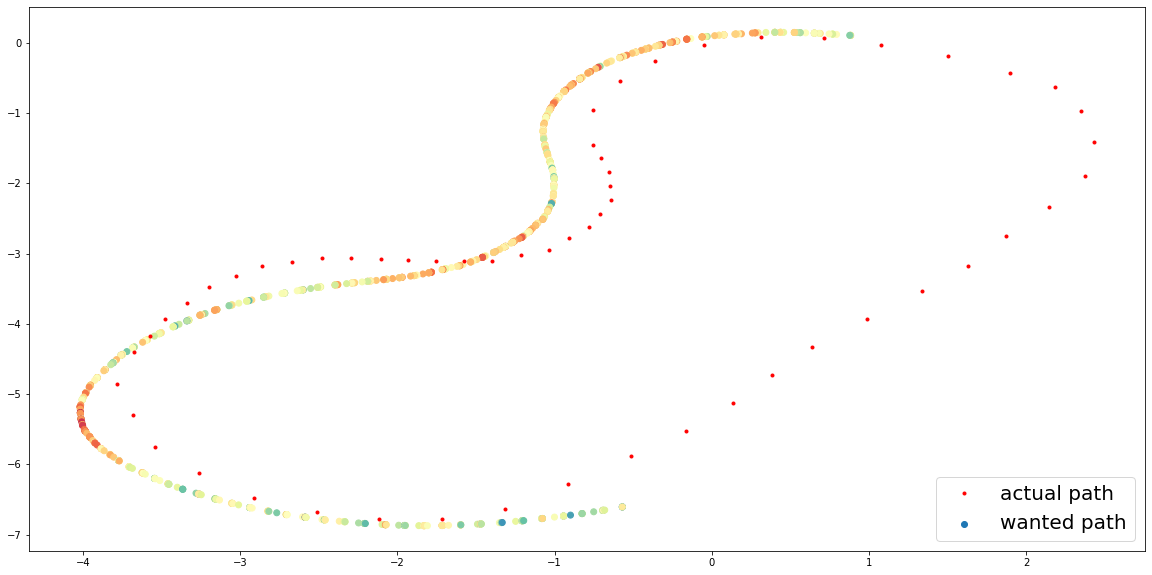

In [24]:
fig = plt.figure(figsize=(20,10))
plt.scatter(x_avg, y_avg, c=speed_avg, cmap='Spectral')
plt.plot(path_x, path_y, 'r.')
plt.legend(['actual path', 'wanted path'], loc='lower right', fontsize=20)
plt.title('')

Text(0.5, 1.0, 'speed')

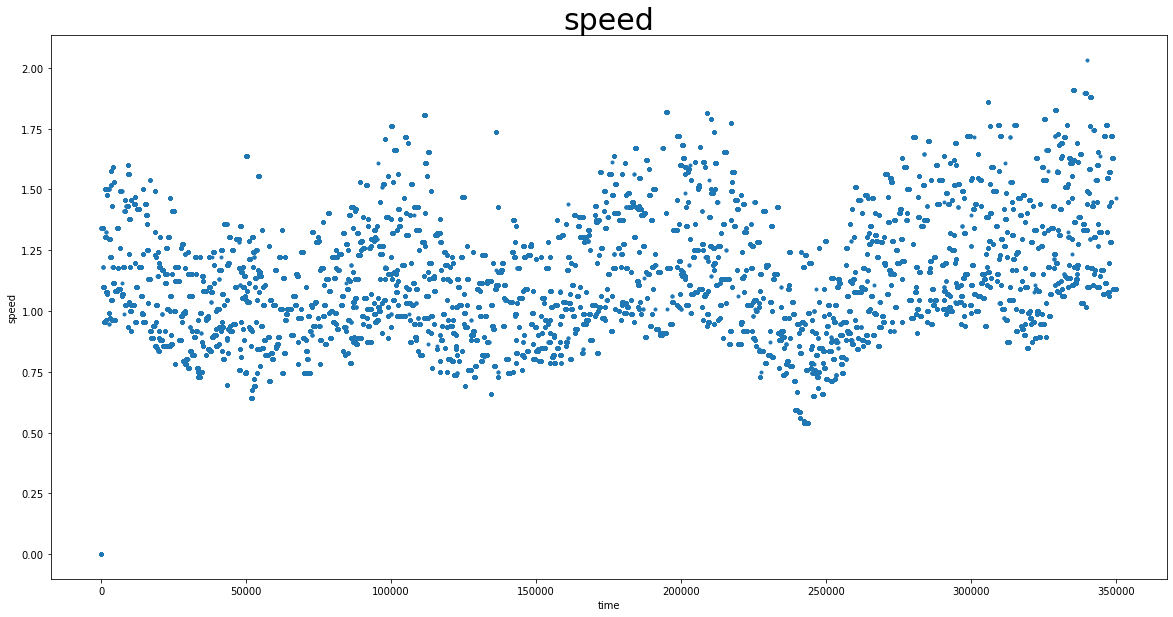

In [18]:
fig = plt.figure(figsize=(20,10))
plt.plot(speed[:][::grad], '.')
plt.xlabel('time')
plt.ylabel('speed')
plt.title('speed', fontsize=30)

In [27]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection="2d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(path_x, path_y, 0, 'red')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)

ax.scatter3D(x_pos[:ride_end_ind], y_pos[:ride_end_ind], speed[:ride_end_ind], c=speed[:ride_end_ind], cmap='Spectral')
#ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

ValueError: Unknown projection '2d'

<Figure size 1440x720 with 0 Axes>

In [20]:
pose_avg = [{'x':x, 'y':y} for (x,y) in zip(x_avg, y_avg)]

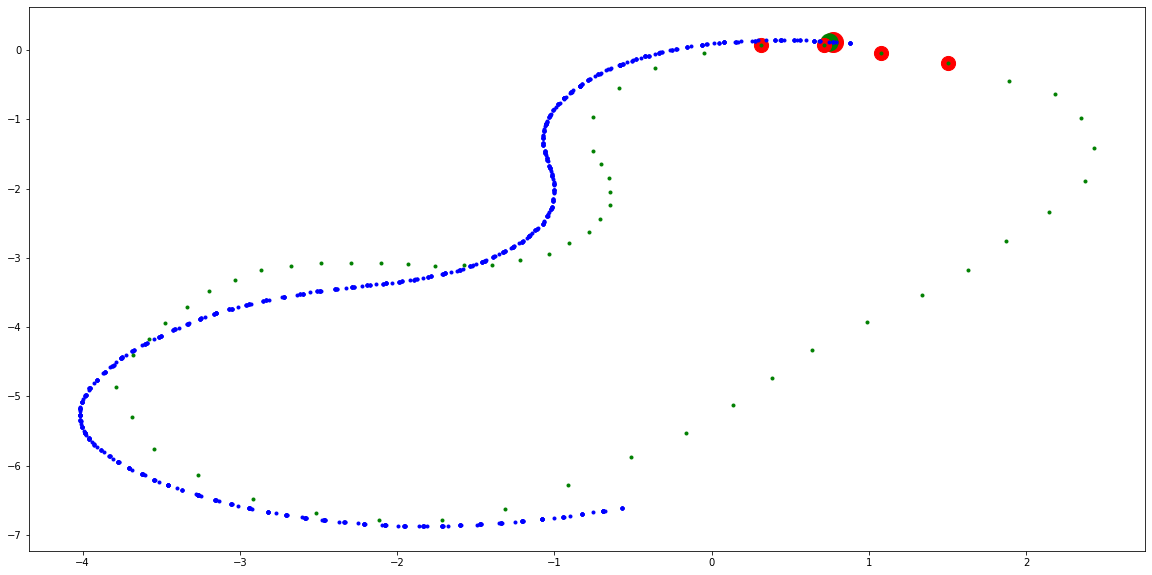

In [21]:
def find_closests_points(pose, path, n_points):
    x = pose['x']
    y = pose['y']
    ref_path = path[:]
    distances = [(path_point['x']-x)**2 + (path_point['y']-y)**2 for path_point in ref_path]
    min_elems = []
    min_indexes = []
    for i in range(n_points):
        min_ind = np.argmin(distances)
        min_elems.append(ref_path[min_ind])
        min_indexes.append(min_ind)
        del distances[min_ind]
        del ref_path[min_ind]
    return {'elems':min_elems, 'index':min_indexes}

el = 11
fig = plt.figure(figsize=(20,10))
plt.plot(x_avg, y_avg, '.b')
plt.plot(path_x, path_y, 'g.')
pose = {'x':x_avg[el], 'y':y_avg[el]}
plt.scatter(pose['x'], pose['y'], marker='o', s=400, c='r')
plt.scatter(x_avg[el+1], y_avg[el+1], marker='o', s=300, c='g')
closests = find_closests_points(pose, path, 4)['elems']
for closest in closests:
    plt.scatter(closest['x'], closest['y'], s=200, c='r')